<center><h1 class="workshop-title">Workshop 3<br>MLE, MAP & Estimation Errors</h1></center>

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/doodle/96/000000/taxi.png"> The NYC Taxi Dataset 

Let us return to the taxi rides [dataset](https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv) from the last workshop.

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/help.png"> Problem Reminder: Estimating the Distribution of Trip Duration

In the last workshop we have tried to describe the distribution of taxi rides duration using non-parametric methods. In this tutorial we will try to use parametric models to evaluate this distribution.

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/process.png"> Reminder: The Workflow

We will follow the same work flow from the workshop

<center><img src="../media/diagrams/workflow_density_estimation.png" width="300px" style="width:300px"/></center>

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/settings.png"> Preparations

We will start by importing some useful packages

In [1]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 90  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/color/96/000000/view-file.png"> Data Inspection (Reminder)

Print out the size and the 10 first rows of the dataset.

In [2]:
data_file = 'https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print_math('Number of rows in the dataset: $N={}$'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
5,5,1.561060,1,7.5,2.20,585.926415,4512.880385,585.168973,4511.540103,9.433333,3,20,20.667222
6,1,2.574944,1,8.0,1.00,586.731409,4515.084445,588.710175,4514.209184,7.950000,5,8,23.841944
7,1,0.804670,2,5.0,0.00,585.344614,4509.712541,585.843967,4509.545089,4.950000,5,29,15.831389
8,1,3.653202,1,10.0,1.10,585.422062,4509.477536,583.671081,4507.735573,11.066667,5,8,2.098333
9,6,1.625433,1,5.5,1.36,587.875433,4514.931073,587.701248,4513.709691,4.216667,3,13,21.783056


### The Data Fields and Types
In this exercise we will only by interested in the following column:

- **duration**: The total duration of the ride (in minutes)

## <img src="../media/icons/icons8-plot-96.png" style="height:50px;display:inline"/>  Plotting the data
Let us plot again the histogram of the durations

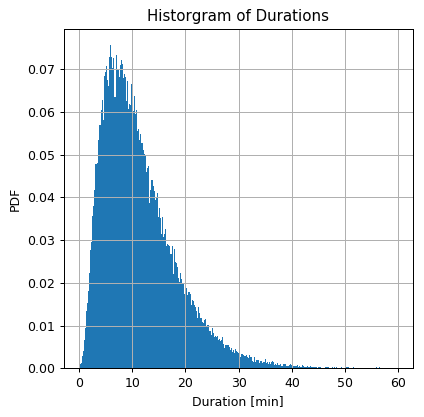

In [3]:
## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True)
ax.set_title('Historgram of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]');

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/doodle/96/000000/multi-edit.png"> Problem Definition

As same as last time:
- The underlying process: A random phenomenon generating taxi rides along with there details
- The task and goal: To find the distribution of rids duration, represented as a PDF.

## Splitting the dataset

We will split the data into 80% train set and 20% test set for later evaluations.

(Although we will not be using the test set in this workshop, it is a good practice to always start by splitting the data)

In [4]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
n_samples_test = n_samples - n_samples_train
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

train_set = dataset.iloc[train_indices]
test_set = dataset.iloc[test_indices]

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/color/96/000000/idea-sharing.png"> Model & Learning Method Suggestion 1 : Normal Distribution + MLE

In this case we will suggest a **normal distribution** as our model. A general normal distribution is define by 2 parameters, it's mean value $\mu$ and it's standard deviation $\sigma$.

In addition, in this step we would want to decide on a method for selecting the model's parameters, in this case we will take the **MLE (Maximum Likelihood Estimation)** approach. This special case of MLE and a normal distribution can be solve analytically. Sadly, this is will not be true in the general case, and we will have to resort to numerical solutions.

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/services.png"> Learning

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/create-new.png"> Exercise 3.1 - MLE + Normal Distribution

1. Use the MLE approach to estimate the PDF of rides duration as a normal distribution.
2. Plot the estimated PDF on top of an histogram of the rides duration.
3. By looking at the two plots, do you thinks that the Gaussian distribution is a good approximation for the data distribution?

### Solution 3.1

#### 1)

(Solution seen in the lecture, appears here only for completeness)

Se shall denote:
- $p_\text{normal}\left(x;\mu,\sigma\right)$ - The PDF of a normal distribution with mean $\mu$ and standard deviation $\sigma$.
- $\boldsymbol{\theta}$ - the vector $\boldsymbol{\theta}=\left[\mu,\sigma\right]^T$.
- $N$ - The number of samples points in the train set.

The Normal distribution is defined by:
$$
p_\text{normal}\left(x;\boldsymbol{\theta}\right)=p_\text{normal}\left(x;\mu,\sigma\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right)
$$

Given a set of independent sample $\left\{x_i\right\}$, the likelihood function is given as:

$$
\mathcal{L}_\text{normal}\left(\boldsymbol{\theta}\right\{x\}) 
 = \prod_i p_\text{normal}\left(x_i;\boldsymbol{\theta}\right)
$$

The log-likelihood function for the normal distribution model is then:
$$
\begin{align*}
l_\text{normal}\left(\boldsymbol{\theta};\{x\}\right)
& = \log\left(\mathcal{L}_\text{normal}\left(\boldsymbol{\theta}\right|\{x\})\right) \\
& = \log\left(\prod_i p_\text{normal}\left(x_i;\boldsymbol{\theta}\right)\right) \\
& = \sum_i\log\left(p_\text{normal}\left(x_i;\boldsymbol{\theta}\right)\right) \\
& = \sum_i\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\left(x_i-\mu\right)^2}{2\sigma^2}\right)\right) \\
& = -N\log\left(\sqrt{2\pi}\sigma\right)-\frac{1}{2\sigma^2}\sum_i\left(x_i-\mu\right)^2 \\
\end{align*}
$$


Under the MLE approach, the optimal parameters $\boldsymbol{\theta}^*$ for the model are given by

$$
\begin{align*}
\boldsymbol{\theta}^*
& = \underset{\boldsymbol{\theta}}{\arg\min}\ -l_\text{normal}\left(\boldsymbol{\theta};\{x\}\right) \\
& = \underset{\boldsymbol{\theta}=\left(\mu,\sigma\right)^T}{\arg\min}\ N\log\left(\sqrt{2\pi}\sigma\right)+\frac{1}{2\sigma^2}\sum_i\left(x_i-\mu\right)^2 \\
\end{align*}
$$

We shall find $\boldsymbol{\theta}^*$ by comparing the derivative of the log-likelihood function to zero.

$$
\begin{align*}
& \begin{cases}
\displaystyle{\frac{\partial l\left(\boldsymbol{\theta}|\{x\}\right)}{\partial\mu}}=0 \\
\displaystyle{\frac{\partial l\left(\boldsymbol{\theta}|\{x\}\right)}{\partial\sigma}}=0 \\
\end{cases}
\\
\Leftrightarrow & \begin{cases}
\displaystyle{\frac{\sum_i\left(x_i-\mu\right)}{\sigma^2}}=0 \\
\displaystyle{-\frac{N}{\sigma}+\frac{2\sum_i\left(x_i-\mu\right)^2}{2\sigma^3}}=0 \\
\end{cases}\\
\Leftrightarrow & \begin{cases}
\mu=\displaystyle{\frac{1}{N}\sum_i x_i} \\
\sigma=\sqrt{\displaystyle{\frac{1}{N}\sum_i\left(x_i-\mu\right)^2}} \\
\end{cases}
\end{align*}
$$

The actual calculation:

In [5]:
## extarcting the samples
x = train_set['duration'].values

## Normal distribution parameters
mu = np.sum(x) / len(x)
sigma = np.sqrt(np.sum((x - mu) ** 2) / len(x))

print_math('$\\mu = {:.01f}\\ \\text{{min}}$'.format(mu))
print_math('$\\sigma = {:.01f}\\ \\text{{min}}$'.format(sigma))

From here on we will use [np.mean](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.mean.html) and [np.std](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.std.html) functions to calculate the mean and standard deviation.

In addition [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) has a wide range of distribution models. Each model comes with a set of methods for calculating the CDF, PDF, performing MLE fit, generate samples and more.

##### 2)
We shall plot the estimated PDF on top of the histogram.

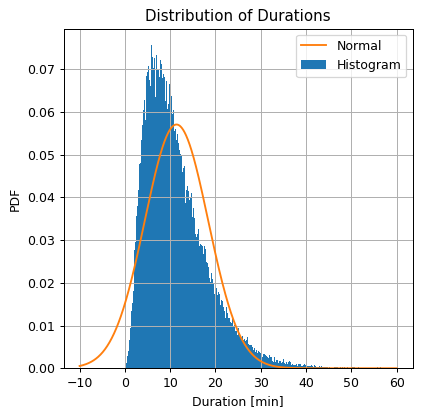

In [6]:
## Define the grid
grid = np.arange(-10, 60 + 0.1, 0.1)

## Import the normal distribution model from SciPy
from scipy.stats import norm

## Define the normal distribution object
norm_dist = norm(mu, sigma)

## Calculate the normal distribution PDF over the grid
norm_pdf = norm_dist.pdf(grid)

## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True, label='Histogram')
ax.plot(grid, norm_pdf, label='Normal')
ax.set_title('Distribution of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend();

#### 3)

Since we did not define any actual evaluation method, we will estimate how good is the density estimation in a qualitative manner rather then a quantitative one. We will do so by looking at how similar it is to the histogram.

It seems that the normal distribution gives a very rough approximation of the real distribution. In some cases this would be good enough as a first order approximation, but in this case we would like to do better.

One very disturbing fact, for example, is the that there is a non zero probability go get negative ride durations, which is obviously not realistic.

Let us try to propose a better model in order to get a better approximation.

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/color/96/000000/idea-sharing.png"> Model & Learning Method Suggestion 2 : Rayleigh Distribution + MLE

The Rayleigh distribution describes the distribution of the magnitude of a 2D Gaussian vector with zero mean and no correlation between it's two components. I.e. if $Z$ has the following distribution:

$$
\boldsymbol{Z}\sim N\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} \sigma & 0 \\ 0 & \sigma \end{bmatrix}\right)
$$

Than $\left\lVert\boldsymbol{Z}\right\rVert_2=\sqrt{Z_x^2+Z_y^2}$ has a Rayleigh distribution.

The PDF of the Rayleigh distribution is given by:

$$
p_\text{Rayleigh}\left(z;\sigma\right)=\frac{z}{\sigma^2}\exp\left({-\frac{z^2}{2\sigma^2}}\right), \quad z\geq0
$$

Notice that here the distribution is only defined for positive values. The Rayleigh distribution has only one parameter $\sigma$ which is called the scale parameter. Unlike in case of the normal distribution, here $\sigma$ is not equal to the standard deviation.

For consistency we will denote the 1D vector of parameters: $\boldsymbol{\theta}=\left[\sigma\right]$

We will now give a short motivation for preferring the Rayleigh distribution. This section can be skipped, and the Rayleigh distribution can be assumed to be simply selected as a good guess.

### Motivation For Using Rayleigh Distribution

We have started with an assumption that the duration a taxi ride is normally distributed. Let us instead assume that the quantity which is normally distributed is the 2D distance $\boldsymbol{D}$, between the pickup location to the drop off location.

I.e., we are assuming that the random variable $\boldsymbol{D}$ is a 2D Gaussian vector. For simplicity, we will also assume that the $x$ and $y$ components of $\boldsymbol{D}$ are uncorrelated with equal variance and zero mean. I.e. we assume that:

$$
\boldsymbol{D}\sim N\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} \sigma_D & 0 \\ 0 & \sigma_D \end{bmatrix}\right)
$$

In addition, let us also assume that the taxis speed, $v$ is constant. Therefore the relation between the ride duration $X$ and the distance vector $\boldsymbol{D}$ is:

$$
X = \frac{\left\lVert D\right\rVert_2}{v}
$$

In this case $x$ will have a Rayleigh distribution with a scale parameter $\sigma=\frac{\sigma_D}{v}$

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/services.png"> Learning

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/create-new.png"> Exercise 3.2 - MLE + Rayleigh Distribution

Repeat the process using the Rayleigh distribution 

### Solution 3.2

The log likelihood function in this case given by:
$$
\begin{align*}
l_\text{rayleigh}\left(\boldsymbol{\theta}|\{x\}\right) 
& = \sum_i\log\left(p_\text{rayleigh}\left(x_i;\boldsymbol{\theta}\right)\right) \\
& = \sum_i\log\left(x_i\right)-2N\log\left(\sigma\right)-\frac{1}{2\sigma^2}\sum_ix^2
\end{align*}
$$

Under the MLE approach,optimal parameters, are defined by $\boldsymbol{\theta}^*=\underset{\boldsymbol{\theta}}{\arg\min}\ -l_\text{rayleigh}\left(\boldsymbol{\theta}|\{x\}\right)$.

Like before, we will solve this by differentiating and comparing to zero:

$$
\frac{\partial l_\text{rayleigh}\left(\theta|\{x\}\right)}{\partial\sigma}=0 \\
\Leftrightarrow -\frac{2N}{\sigma}+\frac{\sum_ix^2}{\sigma^3}=0 \\
\Leftrightarrow \sigma = \sqrt{\frac{1}{2N}\sum_i x^2}
$$

The actual calculation and plot:

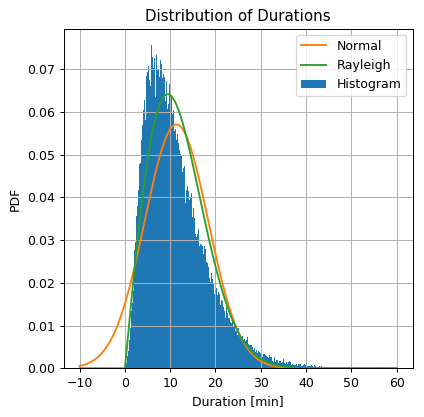

In [7]:
## Import the normal distribution model from SciPy
from scipy.stats import rayleigh

## Find the model's parameters using SciPy
_, sigma = rayleigh.fit(x, floc=0)  ## equivalent to running: sigma = np.sqrt(np.sum(x ** 2) / len(x) / 2)

print_math('$\\sigma = {:.01f}$'.format(sigma))

## Define the Rayleigh distribution object
rayleigh_dist = rayleigh(0, sigma)

## Calculate the Rayleigh distribution PDF over the grid
rayleigh_pdf = rayleigh_dist.pdf(grid)

## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True, label='Histogram')
ax.plot(grid, norm_pdf, label='Normal')
ax.plot(grid, rayleigh_pdf, label='Rayleigh')
ax.set_title('Distribution of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend();

Judging by the similarity to the histogram, the Rayleigh distribution does a slightly better job at approximating the distribution and solves the negative values problem. 

Let us try one more model.

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/color/96/000000/idea-sharing.png"> Model & Learning Method Suggestion 3 : Generalized Gamma Distribution + MLE

The Rayleigh distribution is a special case of a more general family of distributions called the Generalized Gamma distribution. The PDF of the Generalized Gamma distribution is given by the following complex expression:

$$
p_\text{gengamma}\left(z;\sigma,a,c\right)=
\frac{cz^{ca-1}\exp\left(-\left(z/\sigma\right)^c\right)}{\sigma^{ca-1}\Gamma\left(a\right)}
, \quad z\geq0
$$

($\Gamma$ here is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function))

For $c=2$ and $a=1$ we get the Rayleigh distribution.

Unlike the case of the normal and Rayleigh distributions, here we will not be able to find a simple analytic solution for the optimal MLE parameters. However we can use numerical methods for finding the optimal parameters. In practice we will use [SciPy's model for the General Gamma distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gengamma.html#scipy.stats.gengamma) to find the optimal parameters.

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/services.png"> Learning

## <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/create-new.png"> Exercise 3.3 - MLE + Generalized Gamma  Distribution

Repeat the process using the Generalized Gamma distribution. Use SciPy to calculated the MLE parameters.

### Solution 3.3

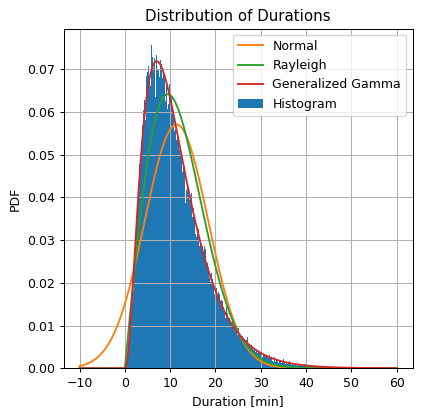

In [8]:
## Import the normal distribution model from SciPy
from scipy.stats import gengamma

## Find the model's parameters using SciPy
a, c, _, sigma  = gengamma.fit(x, floc=0)

print_math('$a = {:.01f}$'.format(a))
print_math('$c = {:.01f}$'.format(c))
print_math('$\\sigma = {:.01f}$'.format(sigma))

## Define the generalized gamma distribution object
gengamma_dist = gengamma(a, c, 0, sigma)

## Calculate the generalized gamma distribution PDF over the grid
gengamma_pdf = gengamma_dist.pdf(grid)

## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True, label='Histogram')
ax.plot(grid, norm_pdf, label='Normal')
ax.plot(grid, rayleigh_pdf, label='Rayleigh')
ax.plot(grid, gengamma_pdf, label='Generalized Gamma')
ax.set_title('Distribution of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend();

The Generalized Gamma distribution results in a distribution with a PDF which is much similar to the shape of the histogram.

# <img style="display:inline;height:50px" height="50px" src="https://img.icons8.com/plasticine/100/000000/create-new.png"> Exercise 3.4 - MAP and a Toy Model

In this exercise we will take a look at a very simple toy example. Consider the following process:
1. A random number $a$ is generated once following the normal distribution: $a \sim N\left(0, \sigma_A^2\right)$
2. A series of random numbers $\left\{x_i\right\}$ is then generated independently following the normal distribution: $X \sim N\left(a, \sigma_X^2\right)$

We would look at a few cases of estimating the distribution of $X$.

Questions:

1. Start by using the exact model which generates the data, i.e. a normal distribution with a known standard deviation of $\sigma_X$ and mean value which is normally distributed with mean value 0 and a standard deviation of $\sigma_A$. Use the  MAP approach to calculate the estimated distribution of $X$ given a dataset $\left\{x_i\right\}$.

2. Use $\sigma_A=1$ and $\sigma_X=3$ to randomly generate the dataset $\left\{x_i\right\}$ with a size of 10 samples. Using the MAP estimation, calculate the actual parameters and the estimation error between the true and the estimated mean value of $X$.

3. Compare it to an estimation based on MLE.

4. MAP works great when we have a good prior distribution. Let us see what happens if our prior is not that good. Repeat the process, but this time use $\tilde{\sigma}_A=\left[0.25, 0.5, 2, 4\right]$ for calculating the MAP estimation (instead of the real value of $\sigma_A=1$)

### Solution 3.3

#### 1)

Here we assume that the entire model is known including $\sigma_A$ and $\sigma_X$. However following the MAP approach we would like to find the specific parameters of of the distribution of the data $\left\{x_i\right\}$ which are most probable given the prior distribution and the data. In this case, of a normal distribution with a known standard deviation, the only parameter of the model is the distribution's mean value $a$, therefore we will define the vector of parameters $\boldsymbol{\theta}=\left[a\right]$.
Like always, we will use $\theta$ to 

Under this approach we are looking for the model's optimal parameters according to:

$$
\begin{align*}
\boldsymbol{\theta}^*
& = \underset{\boldsymbol{\theta}}{\arg\max}\ p\left(\left\{x_i\right\}|\boldsymbol{\theta}\right)p\left(\boldsymbol{\theta}\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}\ -\log\left(p\left(\left\{x_i\right\}|\boldsymbol{\theta}\right)\right)-\log\left(p\left(\boldsymbol{\theta}\right)\right)\\
& = \underset{\boldsymbol{\theta}}{\arg\min}\ -\sum_i\log\left(p\left(x_i|\boldsymbol{\theta}\right)\right)-\log\left(p\left(\boldsymbol{\theta}\right)\right)\\
& = \underset{\boldsymbol{\theta}}{\arg\min}\ N\log\left(\sqrt{2\pi}\sigma_X\right)+\frac{1}{2\sigma_X^2}\sum_i\left(x_i-a\right)^2 + \log\left(\sqrt{2\pi}\sigma_A\right)+\frac{1}{2\sigma_A^2}a^2\\
& = \underset{\boldsymbol{\theta}}{\arg\min}\ \frac{1}{2\sigma_X^2}\sum_i\left(x_i-a\right)^2 + \frac{1}{2\sigma_A^2}a^2
\end{align*}
$$

We will find $\boldsymbol{\theta}^*$ by differentiating and compare to zero:

$$
\begin{align*}
& \frac{\partial}{\partial a}\left[\frac{1}{2\sigma_X^2}\sum_i\left(x_i-a\right)^2 + \frac{1}{2\sigma_A^2}a^2\right] = 0 \\
\Leftrightarrow & \frac{1}{\sigma_X^2}\sum_i\left(a-x_i\right) + \frac{1}{\sigma_A^2}a = 0 \\
\Leftrightarrow & \left(\frac{1}{\sigma_A^2}+\frac{N}{\sigma_X^2}\right)a = \frac{\sum_i x_i}{\sigma_X^2} \\
\Leftrightarrow & a = \frac{\sigma_A^2}{\sigma_X^2/N+\sigma_A^2}\frac{1}{N}\sum_i x_i \\
\end{align*}
$$

#### 2)

We shall generate the data and calculate the value of $a$ and the estimation error

In [9]:
n_samples = 10
sigma_x = 3
sigma_a = 1

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Draw a random value for a
a = rand_gen.randn() * sigma_a

## Draw N random samples for {x_i}
x = rand_gen.randn(n_samples) * sigma_x + a

## Calaulte the MAP estimation for the mean value
mu_hat_map = sigma_a ** 2 / (sigma_x ** 2 / n_samples + sigma_a ** 2) * np.mean(x)

## Calaulte the estimation error
estimation_error_map = np.abs(mu_hat_map-a)

print_math('The true mean value of $X$ is: $\\mu=a = {:.03f}$'.format(a))
print_math('By using MAP we get:')
print_math('- $\\hat{{\\mu}}_\\text{{MAP}} = {:.03f}$'.format(mu_hat_map))
print_math('- Estimation error: $\\left|\\hat{{\\mu}}_\\text{{MAP}}-\\mu\\right| = {:.03f}$'.format(estimation_error_map))

#### 3)

We saw earlier that based on the MLE approach, the optimal mean value of a normal distribution is equal to the average value of the samples: $\frac{1}{N}\sum_i x_i$

In [10]:
## Calaulte the MLE estimation for the mean value
mu_hat_mle = x.mean()

## Calaulte the estimation error
estimation_error_mle = np.abs(mu_hat_mle-a)

print_math('By using MLE we get:')
print_math('- $\\hat{{\\mu}}_\\text{{MLE}} = {:.03f}$'.format(mu_hat_mle))
print_math('- Estimation error: $\\left|\\hat{{\\mu}}_\\text{{MLE}}-\\mu\\right| = {:.03f}$'.format(estimation_error_mle))

Let us plot the two estimations along with the true distribution

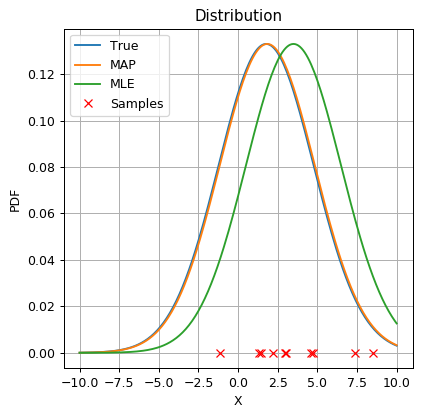

In [11]:
## Define the grid
grid = np.arange(-10, 10 + 0.1, 0.1)

## Calculate the normal distribution PDF over the grid
true_pdf = norm.pdf(grid, a, sigma_x)
map_pdf = norm.pdf(grid, mu_hat_map, sigma_x)
mle_pdf = norm.pdf(grid, mu_hat_mle, sigma_x)

## Prepare the figure
fig, ax = plt.subplots()
ax.plot(grid, true_pdf, label='True')
ax.plot(grid, map_pdf, label='MAP')
ax.plot(grid, mle_pdf, label='MLE')
ax.plot(x, np.zeros(x.shape), 'rx', label='Samples')
ax.set_title('Distribution')
ax.set_ylabel('PDF')
ax.set_xlabel('X')
ax.legend();

In this example, the samples, drawn according to the true distribution, happened to be more concentrated on the left side of the Gaussian. This causes the MLE to give an estimation for the mean which is slightly higher then it's real value. By using the MAP approach along with the prior on $A$, which states that $A$ is more likely to have a value closer to zero, the estimation of the mean value gets closer to zero and also closer to the real mean value.

#### 4)

We shall calculate the MAP estimation using $\tilde{\sigma}_A=\left[0.25, 0.5, 1, 2, 4\right]$

In [12]:
## Define the list of sigma_a_tilde
sigma_a_tilde_list = [0.25, 0.5, 1, 2, 4]

print_math('By using MAP with different values of $\\tilde{{\\sigma}}_A$ we get:')
for i, sigma_a_tilde in enumerate(sigma_a_tilde_list):
    ## Calaulte the MLE estimation for the mean value
    mu_hat_map_tilde = sigma_a_tilde ** 2 / (sigma_x ** 2 / n_samples + sigma_a_tilde ** 2) * np.mean(x)
    
    ## Calaulte the estimation error
    estimation_error_map_tilde = np.abs(mu_hat_map_tilde-a)

    print_math('- $\\tilde{{\\sigma}}_A={:.2f}\\quad\\Rightarrow\\hat{{\\mu}} = {:.3f},\\quad\\left|\\hat{{\\mu}}-\\mu\\right| = {:.3f}$'.format(sigma_a_tilde, mu_hat_map_tilde, estimation_error_map_tilde))


To get a bit more intuition, let us plotting $\hat{\mu}$ as a function of $\tilde{\sigma}_A$

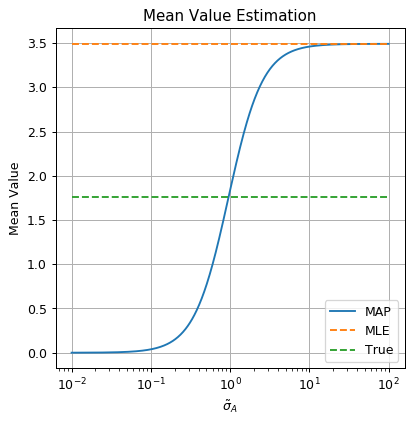

In [13]:
sigma_a_grid = np.logspace(-2, 2, 1000)
mu_hat_map_grid = sigma_a_grid ** 2 / (sigma_x ** 2 / n_samples + sigma_a_grid ** 2) * np.mean(x)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(sigma_a_grid, mu_hat_map_grid, label='MAP')
ax.plot([sigma_a_grid[0], sigma_a_grid[-1]], [mu_hat_mle, mu_hat_mle], '--', label='MLE')
ax.plot([sigma_a_grid[0], sigma_a_grid[-1]], [a, a], '--', label='True')
ax.set_title('Mean Value Estimation')
ax.set_ylabel('Mean Value')
ax.set_xlabel('$\\tilde{{\\sigma}}_A$')
ax.legend();

### Interpretation

In this case, of a normal distributions as a prior and a normal distribution as a model, the MAP estimation will be a weighted average between the MLE result of $\hat{\mu}=3.492$ and the mean value of the prior distribution, which is 0 in this case.

Not surprisingly we get the best results when our prior is the exact the true underlying distribution with: $\tilde{\sigma}_A=\sigma_A=1$.

When the prior is very strong, i.e. a very narrow Gaussian, $\tilde{\sigma}_A\rightarrow 0$, this dictates that the probability of the mean value to be far from 0 is very low, which results in an estimation which is very close to 0.

When the prior is very weak, i.e. a very wide Gaussian, $\tilde{\sigma}_A\rightarrow\infty$, the prior probability becomes close to uniform in the relevant range of values. This is equal to not using a prior at all, and the MAP estimation approaches the MLE.

In general, using a prior could also give results which are worse than the MLE. This would happen for example if as a prior we would use a normal distribution with a mean value which is very different then the true mean value of $A$.

In practice in many cases it is hard to choose a good prior, a fact which makes the MAP approach a bit more difficult to use in practice.

# <img style="display:inline;height:50px" height="50px" src="https://upload.wikimedia.org/wikipedia/commons/3/3c/Cc-by_new.svg">  Attributions
Icons in these notebooks were made by:
- <https://icons8.com> is licensed by  [CC 3.0 BY-ND](http://creativecommons.org/licenses/by-nd/3.0/)
- [Freepik](https://www.freepik.com) from <https://www.flaticon.com> is licensed by [CC 3.0 BY](http://creativecommons.org/licenses/by/3.0/)

In [14]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->